Of course. Here is an easy and fast summary of the building blocks of a Convolutional Neural Network (CNN):

### **The 3 Core Building Blocks of a CNN**

A CNN is a special type of neural network designed to process grid-like data, such as images. It's built from three key layers that work together to identify patterns.

#### **1. Convolutional Layer (The Pattern Detector)**
*   **What it does:** This layer uses small filters (or kernels) to slide over the input image and detect features like edges, curves, and textures.
*   **How it works:** Each filter performs a mathematical operation (dot product) on small "receptive fields" of the image. A high value in the resulting **feature map** means the filter found the pattern it's looking for.
*   **Why it's important:** It's the core feature extractor. Using many different filters allows the network to learn to recognize various fundamental patterns.
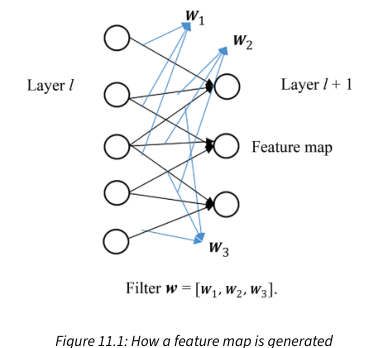


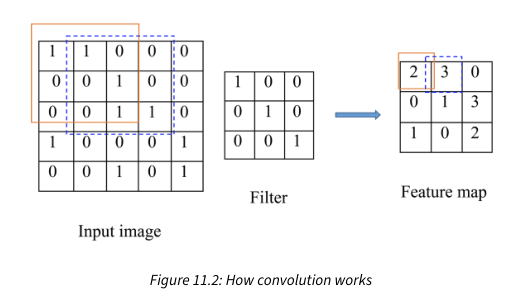

#### **2. Non-Linear Layer (The Activator)**
*   **What it does:** This is simply an **activation function** (almost always **ReLU**) applied right after the convolutional layer.
*   **Why it's important:** The convolution operation is linear. Without a non-linear function, the entire network would just be a linear model, unable to learn complex patterns. ReLU introduces the necessary non-linearity.

#### **3. Pooling Layer (The Simplifier)**
*   **What it does:** This layer **downsamples** the feature maps to make them smaller and more manageable. The most common type is **Max Pooling**, which takes the maximum value from small blocks (e.g., 2x2 pixels).
*   **Why it's important:**
    1.  **Reduces Complexity:** Drastically cuts the number of parameters and computations, preventing overfitting and making training faster.
    2.  **Creates Translation Invariance:** Makes the network care more about *whether* a feature is present rather than its *exact location*. A slightly shifted image will still produce the same pooled output, making the network more robust.

  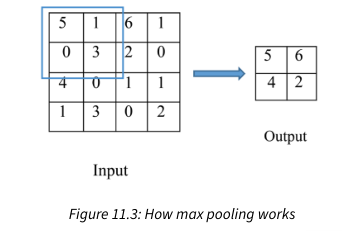

  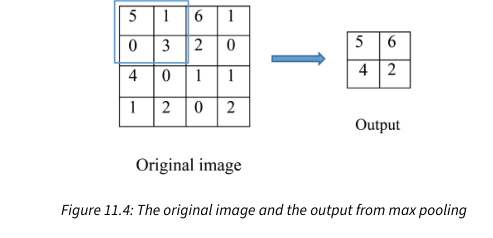

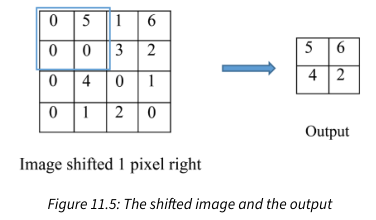
---

### **How They Work Together: The Big Picture**

These layers are stacked together to form a deep hierarchy:
1.  Early layers detect **simple features** (edges, corners).
2.  Middle layers combine these to detect **more complex patterns** (shapes, parts of objects).
3.  Final layers combine those to recognize **entire objects** (a face, a car, a dog).

After these layers, the output is flattened and fed into regular **Fully Connected (Dense) Layers** to perform the final classification (e.g., "this is a cat").

**In short: CNNs use Convolutional layers to find features, Non-Linear layers to enable complex learning, and Pooling layers to simplify everything and make the network efficient and robust.**



### **Architecture for Classification**

A typical CNN is built like a feature extraction funnel that feeds into a classic classifier. Here’s the standard blueprint:

**Phase 1: Feature Extraction (The "Convolutional" Part)**

This part of the network is a stack of repeating blocks that find patterns in the image.

1.  **Convolutional Layer (+ ReLU):** Uses filters to detect patterns (edges, textures, shapes). More layers = more complex patterns.
2.  **Pooling Layer (usually Max Pooling):** Downsizes the feature maps. It reduces computation, controls overfitting, and makes the network care more about *what* a feature is than *where* it is exactly.

*You repeat this **Conv -> ReLU -> Pooling** block as many times as needed.* Early blocks find simple features (edges), later blocks combine them into complex features (eyes, wheels, etc.).

**Phase 2: Classification (The "Neural Network" Part)**

Once the features are extracted, you need to make a prediction based on them.

3.  **Flatten Layer:** Converts the final 2D grid of feature maps into a single long 1D vector. This prepares the data for the standard neural network layers.
4.  **Fully Connected (Dense) Layer(s):** These are regular neural network layers that interpret the extracted features and learn the relationships between them to make a decision.
5.  **Output Layer:** The final layer that gives the prediction.
    *   **Binary Classification:** Sigmoid activation function (1 neuron).
    *   **Multi-Class Classification:** Softmax activation function (1 neuron per class).

---

### **The Intuitive Analogy:**

Think of the CNN as a factory assembly line:
1.  **Convolutional Layers:** are like specialized stations that identify basic parts (screws, metal sheets).
2.  **Pooling Layers:** are like quality control that discard unnecessary details and keep only the most important parts.
3.  **Fully Connected Layers:** are the final assembly team that takes all the identified parts and puts them together to recognize the final product (e.g., "this is a car").

**In short: A CNN uses stacked Conv+Pooling blocks to **hierarchically extract features** from an image, then uses standard Dense layers to **classify** the image based on those features.**

## Exploring the clothing image dataset

In [1]:
import torch, torchvision

from torchvision import transforms


image_path = r'C:\Users\squal\Downloads\image_path'

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = torchvision.datasets.FashionMNIST(root=image_path,
                                                  train=True,
                                                  transform=transform,
                                                  download=True)

test_dataset = torchvision.datasets.FashionMNIST(root=image_path,
                                                 train=False,
                                                 transform=transform,
                                                 download=False)


100%|██████████| 26.4M/26.4M [00:03<00:00, 7.91MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 137kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.55MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.32MB/s]


In [2]:
print(train_dataset)

print(test_dataset)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: C:\Users\squal\Downloads\image_path
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: C:\Users\squal\Downloads\image_path
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [3]:
from torch.utils.data import DataLoader

batch_size = 64

torch.manual_seed(42)

train_dl = DataLoader(train_dataset, batch_size, shuffle=True)


In PyTorch, DataLoader is a utility that provides an efficient way to load and preprocess data from a
dataset during training or evaluation of machine learning models. It essentially wraps around a dataset
and provides methods to iterate over batches of data. This is particularly useful when working with
large datasets that do not fit entirely in memory

Key features of DataLoader:

• Batching: It automatically divides the datase into batches of specified size, allow-
ing you to work with mini-batches of data during training.

• Shuffling: You can set the shuffle parameter to True to shuffle the data before
each epoch, which helps in reducing bias and improving convergence.



In [4]:
data_iter = iter(train_dl)


images, labels = next(data_iter)

print(labels)


tensor([5, 7, 4, 7, 3, 8, 9, 5, 3, 1, 2, 3, 2, 3, 3, 7, 9, 9, 3, 2, 4, 6, 3, 5,
        5, 3, 2, 0, 0, 8, 4, 2, 8, 5, 9, 2, 4, 9, 4, 4, 3, 4, 9, 7, 2, 0, 4, 5,
        4, 8, 2, 6, 7, 0, 2, 0, 6, 3, 3, 5, 6, 0, 0, 8])


The label arrays do not include class names. Hence, we define them as follows and will use them for
plotting later on:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
print(images[0].shape)
print(torch.max(images), torch.min(images))

torch.Size([1, 28, 28])
tensor(1.) tensor(0.)


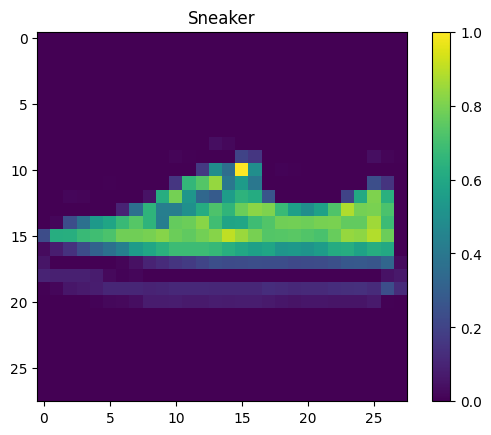

In [7]:
import numpy as np
import matplotlib.pyplot as plt
npimg = images[1].numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.colorbar()
plt.title(class_names[labels[1]])
plt.show()

In PyTorch, np.transpose(npimg, (1, 2, 0)) is used when visualizing images using
matplotlib. (1, 2, 0) is a tuple representing the new order of dimensions. In PyTorch,
images are represented in the format (channels, height, width). However, matplotlib
expects images to be in the format (height, width, channels). np.transpose(npimg,
(1, 2, 0)) is used to rearrange the dimensions of the image array to match the format
that matplotlib expects

Similarly, we display the first 16 training samples, as follows:

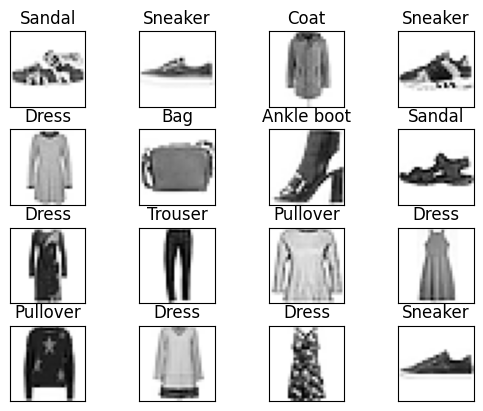

In [8]:
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.subplots_adjust(hspace=.3)
  plt.xticks([])
  plt.yticks([])
  npimg = images[i].numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap="Greys")
  plt.title(class_names[labels[i]])
plt.show()

## Classifying clothing images with CNNs

### Architecting the CNN model

In [9]:
import torch.nn as nn
model = nn.Sequential()

For the convolutional extractor, we are going to use three convolutional layers. We start with the first
convolutional layer with 32 small-sized 3 * 3 filters. This is implemented with the following code:

In [10]:
model.add_module('conv1',
                 nn.Conv2d(in_channels=1,
                           out_channels=32,
                           kernel_size=3)
)

model.add_module('relu1', nn.ReLU())

Note that we use ReLU as the activation function.


The convolutional layer is followed by a max-pooling layer with a 2 * 2 filter:

In [11]:
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))

Here comes the second convolutional layer. It has 64 3 * 3 filters and comes with a ReLU activation
function as well:

In [12]:
model.add_module('conv2',
                 nn.Conv2d(in_channels=32,
                           out_channels=64,
                           kernel_size=3)
)

model.add_module('relu2', nn.ReLU())

The second convolutional layer is followed by another max-pooling layer with a 2 * 2 filter:

In [13]:
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))

We continue adding the third convolutional layer. It has 128 3 * 3 filters at this time:

In [14]:
model.add_module('conv3',
                 nn.Conv2d(in_channels=64,
                           out_channels=128,
                           kernel_size=3)
)

model.add_module('relu3', nn.ReLU())

Let’s take a pause here and see what the resulting filter maps are. We feed a random batch (of 64
samples) into the model we have built so far:

In [15]:
x = torch.rand((64, 1, 28, 28))
print(model(x).shape)

torch.Size([64, 128, 3, 3])


By providing the input shape as (64, 1, 28, 28), which means 64 images within the batch, and image
size 28 * 28, the output has a shape of (64, 128, 3, 3), indicating feature maps with 128 channels
and a spatial size of 3 * 3.
Next, we need to flatten these small 128 * 3 * 3 spatial representations to provide features to the down-
stream classifier backend:

In [16]:
model.add_module('flatten', nn.Flatten())

As a result, we have a flattened output of shape (64, 1152), as computed by the following code:

In [17]:
print(model(x).shape)

torch.Size([64, 1152])


For the classifier backend, we just use one hidden layer with 64 nodes:

In [18]:
model.add_module('fc1', nn.Linear(1152, 64))
model.add_module('relu4', nn.ReLU())

The hidden layer here is the regular fully connected dense layer, with ReLU as the activation function.
Finally, the output layer has 10 nodes representing 10 different classes in our case, along with a soft-
max activation:

In [19]:
model.add_module('fc2', nn.Linear(64, 10))
model.add_module('output', nn.Softmax(dim = 1))

In [20]:
print(model)

Sequential(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (relu3): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1152, out_features=64, bias=True)
  (relu4): ReLU()
  (fc2): Linear(in_features=64, out_features=10, bias=True)
  (output): Softmax(dim=1)
)


In [21]:
from torchsummary import summary
summary(model, input_size=(1, 28, 28), batch_size=-1, device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
              ReLU-2           [-1, 32, 26, 26]               0
         MaxPool2d-3           [-1, 32, 13, 13]               0
            Conv2d-4           [-1, 64, 11, 11]          18,496
              ReLU-5           [-1, 64, 11, 11]               0
         MaxPool2d-6             [-1, 64, 5, 5]               0
            Conv2d-7            [-1, 128, 3, 3]          73,856
              ReLU-8            [-1, 128, 3, 3]               0
           Flatten-9                 [-1, 1152]               0
           Linear-10                   [-1, 64]          73,792
             ReLU-11                   [-1, 64]               0
           Linear-12                   [-1, 10]             650
          Softmax-13                   [-1, 10]               0
Total params: 167,114
Trainable params:

## Fitting the CNN model

In [22]:
import torch
import torch.nn as nn

device = torch.device("cpu")  # torch.device("cuda:0")

model = model.to(device)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [23]:
def train(model, optimizer, num_epochs, train_dl):
    for epoch in range(num_epochs):
        loss_train = 0
        accuracy_train = 0
        for x_batch, y_batch in train_dl:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_train += loss.item() * y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) ==
                          y_batch).float()
            accuracy_train += is_correct.sum().cpu()
        loss_train /= len(train_dl.dataset)
        accuracy_train /= len(train_dl.dataset)
        print(f'Epoch {epoch+1} - loss: {loss_train:.4f} - accuracy: {accuracy_train:.4f}')




We will train the CNN model for 30 iterations and monitor the learning progress:

In [ ]:
num_epochs = 30

train(model, optimizer, num_epochs, train_dl)

Epoch 1 - loss: 1.7337 - accuracy: 0.7313
Epoch 2 - loss: 1.6554 - accuracy: 0.8066
Epoch 3 - loss: 1.6396 - accuracy: 0.8220
Epoch 4 - loss: 1.6305 - accuracy: 0.8306
Epoch 5 - loss: 1.6037 - accuracy: 0.8577
Epoch 6 - loss: 1.5842 - accuracy: 0.8773
Epoch 7 - loss: 1.5750 - accuracy: 0.8861
Epoch 8 - loss: 1.5681 - accuracy: 0.8930
Epoch 9 - loss: 1.5638 - accuracy: 0.8971
Epoch 10 - loss: 1.5591 - accuracy: 0.9022
Epoch 11 - loss: 1.5561 - accuracy: 0.9048
Epoch 12 - loss: 1.5545 - accuracy: 0.9068
Epoch 13 - loss: 1.5524 - accuracy: 0.9087
Epoch 14 - loss: 1.5471 - accuracy: 0.9143
Epoch 15 - loss: 1.5458 - accuracy: 0.9150
Epoch 16 - loss: 1.5430 - accuracy: 0.9182
Epoch 17 - loss: 1.5412 - accuracy: 0.9200
Epoch 18 - loss: 1.5406 - accuracy: 0.9204
Epoch 19 - loss: 1.5392 - accuracy: 0.9221
Epoch 20 - loss: 1.5373 - accuracy: 0.9238
Epoch 21 - loss: 1.5362 - accuracy: 0.9248
Epoch 22 - loss: 1.5337 - accuracy: 0.9275
Epoch 23 - loss: 1.5349 - accuracy: 0.9261
Epoch 24 - loss: 1.5

We are able to achieve an accuracy of around 94% on the training set. If you want to check the perfor-
mance on the test set, you can do the following:

In [ ]:
test_dl = DataLoader(test_dataset, batch_size, shuffle=False)

def evaluate_model(model, test_dl):
  accuracy_test = 0
  with torch.no_grad():
    for x_batch, y_batch in test_dl:
      pred = model.cpu()(x_batch)
      is_correct = torch.argmax(pred, dim=1) == y_batch
      accuracy_test += is_correct.float().sum().item()
  print(f'Accuracy on test set: {100 * accuracy_test / 10000} %')

evaluate_model(model, test_dl)

Accuracy on test set: 90.3 %


The model achieves an accuracy of 90% on the test dataset. Note that this result may vary due to factors
like differences in hidden layer initializations, or non-deterministic operations in GPUs.

## Visualizing the convolutional filters

We extract the convolutional filters from the trained model and visualize them with the following steps.
From the model summary, we know that the layers of conv1, conv2, and conv3 in the model are con-
volutional layers. Using the third convolutional layer as an example, we obtain its filters as follows:

In [ ]:
conv3_weight = model.conv3.weight.data

print(conv3_weight.shape)


torch.Size([128, 64, 3, 3])


It’s apparent that there are 128 filters, where each filter possesses dimensions of 3x3 and contains 64
channels.


Next, for simplification, we visualize only the first channel from the first 16 filters in four rows and
four columns:

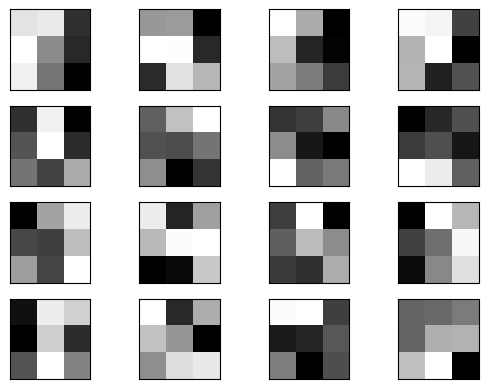

In [ ]:
n_filters = 16

for i in range(n_filters):
  weight = conv3_weight[i].cpu().numpy()
  plt.subplot(4, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(weight[0], cmap='gray')
plt.show()

# Boosting the CNN classifier with data augmentation

### Flipping for data augmentation

There are many ways to augment image data. The simplest one is probably flipping an image horizon-
tally or vertically. For instance, we will have a new image if we flip an existing image horizontally. To
create a horizontally flipped image, we utilize transforms.functional.hflip, as follows

In [ ]:
image = images[1]
img_flipped = transforms.functional.hflip(image)

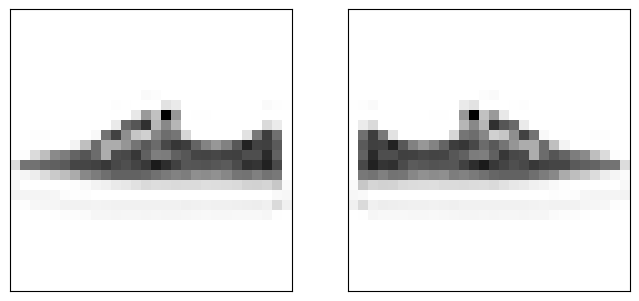

In [ ]:
def display_image_greys(image):
  npimg = image.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap="Greys")
  plt.xticks([])
  plt.yticks([])
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
display_image_greys(image)
plt.subplot(1, 2, 2)
display_image_greys(img_flipped)
plt.show()

In training using data augmentation, we will create manipulated images using a random generator.
For horizontal flipping, we will use transforms.RandomHorizontalFlip, which randomly flips images
horizontally with a 50% chance, effectively augmenting the dataset. Let’s see three output samples:

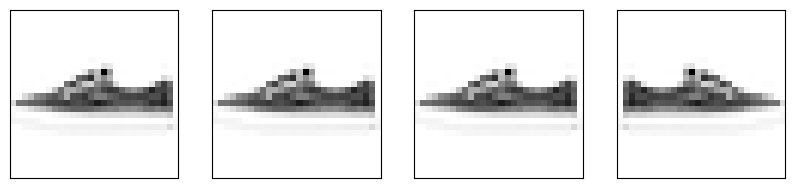

In [ ]:
torch.manual_seed(42)
flip_transform = transforms.Compose([transforms.RandomHorizontalFlip()])
plt.figure(figsize=(10, 10))
plt.subplot(1, 4, 1)
display_image_greys(image)
for i in range(3):
  plt.subplot(1, 4, i+2)
  img_flip = flip_transform(image)
  display_image_greys(img_flip)

In general, the horizontally flipped images convey the same message as the original ones. Verti-
cally flipped images are not frequently seen, although you can generate them using transforms.
RandomVerticalFlip. It is also worth noting that flipping only works in orientation-insensitive cases,
such as classifying cats and dogs or recognizing parts of cars. On the contrary, it is dangerous to do
so in cases where orientation matters, such as classifying between right and left turn signs

### Rotation for data augmentation

Instead of rotating every 90 degrees as in horizontal or vertical flipping, a small-to-medium degree ro-
tation can also be applied in image data augmentation. Let’s look at random rotation using transforms.
We use RandomRotation in the following example:

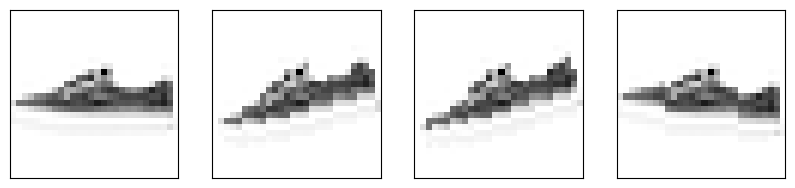

In [ ]:
torch.manual_seed(42)
rotate_transform = transforms.Compose([transforms. RandomRotation(20)])
plt.figure(figsize=(10, 10))
plt.subplot(1, 4, 1)

display_image_greys(image)

for i in range(3):
  plt.subplot(1, 4, i+2)
  img_rotate = rotate_transform(image)
  display_image_greys(img_rotate)

In the preceding example, the image is rotated by any degree ranging from -20 (counterclockwise)
to 20 (clockwise).

### Cropping for data augmentation

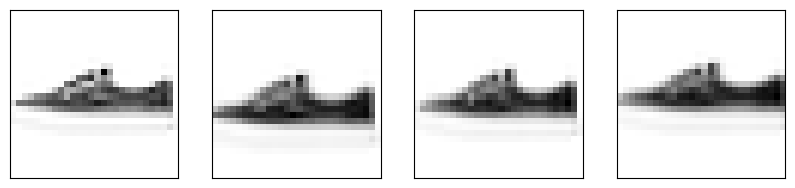

In [ ]:
torch.manual_seed(42)
crop_transform = transforms.Compose([
transforms.RandomResizedCrop(size=(28, 28), scale=(0.7, 1))])
plt.figure(figsize=(10, 10))
plt.subplot(1, 4, 1)
display_image_greys(image)
for i in range(3):
  plt.subplot(1, 4, i+2)
  img_crop = crop_transform(image)
  display_image_greys(img_crop)

Here, size specifies the size of the output image after cropping and resizing; scale defines the range
of scaling for cropping. If set to (min_scale, max_scale), the crop area’s size will be randomly chosen
to be between min_scale and max_scale times the original image’s size.




As you can see, scale=(0.7, 1.0) indicates that the crop area’s size can vary between 70% and 100%
of the original image’s size.

# Improving the clothing image classifier with data augmentation

Armed with several common augmentation methods, we will now apply them to train our image
classifier on a small dataset in the following steps:

1. We start by constructing the transform function by combining all the data augmentation
techniques we just discussed:

In [ ]:
torch.manual_seed(42)
transform_train = transforms.Compose([
  transforms.RandomHorizontalFlip(),
  transforms.RandomRotation(10),
  transforms.RandomResizedCrop(size=(28, 28),
                               scale=(0.9, 1)),
  transforms.ToTensor(),
])

Here, we employ horizontal flip, rotation of up to 10 degrees, and cropping, with dimensions
ranging from 90% to 100% of the original size.

2. We reload the training dataset with this transform function and only use 500 samples for
training:

In [ ]:
train_dataset_aug = torchvision.datasets.FashionMNIST(root=image_path,
                                                      train=True,
                                                      transform=transform_train,
                                                      download=False)

from torch.utils.data import Subset
train_dataset_aug_small = Subset(train_dataset_aug, torch.arange(500))


We will see how data augmentation improves generalization and performance with a very
small training set available.

3. Load this small but augmented training set into batches of 64 samples as we did previously:

In [ ]:
train_dl_aug_small = DataLoader(train_dataset_aug_small,
                                batch_size,
                                shuffle=True)

Note that even for the same original image, iterating using this data loader will produce different
augmented images, which could be flipped, rotated, or cropped within the specified ranges.

4. Next, we initialize the CNN model using the same architecture we used previously and the
optimizer accordingly:

In [ ]:
model = nn.Sequential()
model.add_module('conv1',
                 nn.Conv2d(in_channels=1,
                           out_channels=32,
                           kernel_size=3)
)

model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model.add_module('conv2',
                 nn.Conv2d(in_channels=32,
                           out_channels=64,
                           kernel_size=3)
)

model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))
model.add_module('conv3',
                 nn.Conv2d(in_channels=64,
                           out_channels=128,
                           kernel_size=3)
)

model.add_module('relu3', nn.ReLU())
model.add_module('flatten', nn.Flatten())
model.add_module('fc1', nn.Linear(1152, 64))
model.add_module('relu4', nn.ReLU())
model.add_module('fc2', nn.Linear(64, 10))
model.add_module('output', nn.Softmax(dim = 1))

model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

5. Now we train the model on the augmented small dataset:

In [ ]:
train(model, optimizer, 1000, train_dl_aug_small)

Epoch 1 - loss: 2.3013 - accuracy: 0.1400
Epoch 2 - loss: 2.2805 - accuracy: 0.2100
Epoch 3 - loss: 2.1840 - accuracy: 0.3420
Epoch 4 - loss: 2.0743 - accuracy: 0.3980
Epoch 5 - loss: 2.0438 - accuracy: 0.4140
Epoch 6 - loss: 2.0460 - accuracy: 0.4140
Epoch 7 - loss: 2.0370 - accuracy: 0.4220
Epoch 8 - loss: 2.0349 - accuracy: 0.4200
Epoch 9 - loss: 2.0096 - accuracy: 0.4500
Epoch 10 - loss: 1.9846 - accuracy: 0.4840
Epoch 11 - loss: 1.9731 - accuracy: 0.4940
Epoch 12 - loss: 1.9589 - accuracy: 0.5060
Epoch 13 - loss: 1.9623 - accuracy: 0.5000
Epoch 14 - loss: 1.9395 - accuracy: 0.5220
Epoch 15 - loss: 1.9270 - accuracy: 0.5340
Epoch 16 - loss: 1.9118 - accuracy: 0.5460
Epoch 17 - loss: 1.8999 - accuracy: 0.5540
Epoch 18 - loss: 1.8745 - accuracy: 0.6020
Epoch 19 - loss: 1.8581 - accuracy: 0.6060
Epoch 20 - loss: 1.8381 - accuracy: 0.6320
Epoch 21 - loss: 1.8379 - accuracy: 0.6220
Epoch 22 - loss: 1.8694 - accuracy: 0.5920
Epoch 23 - loss: 1.8299 - accuracy: 0.6440
Epoch 24 - loss: 1.8

6. Let’s see how it performs on the test set:

In [ ]:
evaluate_model(model, test_dl)

Accuracy on test set: 78.56 %


The model with data augmentation has a classification accuracy of 79.24% on the test set. Note
that this result may vary

We also experimented with training without data augmentation, resulting in a test set accuracy of
approximately 76%. When employing data augmentation, the accuracy improved to 79%. As always,
feel free to fine-tune the hyperparameters as we did in Chapter 6, Predicting Stock Prices with Artificial
Neural Networks, and see if you can further improve the classification performance.
Transfer learning is an alternative method to enhance the performance of a CNN classifier. Let’s
proceed to the following section.

## Advancing the CNN classifier with transfer learning

Of course. Here is a condensed, easy-to-reference summary of transfer learning with CNNs, perfect for a cheatsheet notebook.

---

### **Transfer Learning Cheatsheet**

**🚀 What is it?**
Reusing a pre-trained model (on a large dataset like ImageNet) as a starting point for a new, related task. It's faster and more effective than training from scratch, especially with limited data.

**🎯 Why Use It?**
*   **Saves Time & Compute:** Leverages existing learned features (edges, textures, patterns).
*   **Works Great with Small Datasets:** Avoids overfitting; doesn't need massive amounts of data.

---

### **The Two Main Approaches**

#### **1. Feature Extraction**
**Use when:** Your dataset is small and very similar to the original pre-training data.
*   **Step 1:** Take a pre-trained model (e.g., VGG, ResNet).
*   **Step 2:** **Remove** the original classification head (the final fully-connected layers).
*   **Step 3:** **Freeze** the convolutional base (its weights won't be updated during training).
*   **Step 4:** **Add a new classifier head** on top (new layers tailored to your number of classes).
*   **Step 5:** Train **only the new head**; the base acts as a fixed feature extractor.

#### **2. Fine-Tuning**
**Use when:** Your dataset is larger and/or somewhat different from the pre-training data.
*   **Step 1:** First, do **Feature Extraction** (steps 1-4 above) and train the new head.
*   **Step 2:** **Unfreeze** some of the later layers of the pre-trained base.
*   **Step 3:** Train the **entire model** (unfrozen base + your head) at a very **low learning rate**.
    *   This slightly adjusts the pre-trained features to be more specific to your new task.

**⚠️ Warning:** Never fine-tune the entire base from the start. Always train the new head first to stabilize the learning process.

---

### **Popular Pre-Trained Model Architectures**

| Model | Key Idea | Best For |
| :--- | :--- | :--- |
| **VGG16/VGG19** | Simple, uniform stacks of 3x3 conv layers. | Good baseline for feature extraction. |
| **ResNet** | Uses **residual connections** (skip connections) to solve vanishing gradients in very deep networks. | Powerful, standard choice for most tasks. |
| **Inception (GoogLeNet)** | **Inception modules** use parallel convs with different kernel sizes to capture multi-scale features. | Computationally efficient, good accuracy. |
| **EfficientNet / MobileNet** | Designed for **lightweight** deployment on mobile/edge devices. | Speed and efficiency are critical. |

**Rule of Thumb:** Start with **ResNet** or **EfficientNet** for a good balance of accuracy and speed.

---

### **Quick Code Workflow (Pseudocode)**

```python
# 1. Load a pre-trained base model and freeze its weights
base_model = ResNet50(weights='imagenet', include_top=False)
base_model.trainable = False # Freeze for feature extraction

# 2. Add your new custom head on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(), # Flattens the feature maps
    Dense(256, activation='relu'),
    Dropout(0.5), # Regularization to prevent overfitting
    Dense(10, activation='softmax') # Output layer for your # of classes
])

# 3. Compile and train for feature extraction
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.fit(train_data, epochs=10)

# 4. (Optional) Unfreeze some layers for Fine-Tuning
base_model.trainable = True
# Typically only unfreeze later layers
for layer in base_model.layers[:100]:
    layer.trainable = False

# Re-compile with a very low learning rate
model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy')
model.fit(train_data, epochs=5) # Train the whole model
```

## Improving the clothing image classifier by fine-tuning ResNets

1. We start by importing the pretrained ResNet-18 model from torchvision:

In [ ]:
from torchvision.models import resnet18
my_resnet = resnet18(weights='IMAGENET1K_V1')

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 106MB/s]


2. Since the ImageNet-1K dataset comprises RGB images, the first convolutional layer in the
original ResNet is designed for three-dimensional inputs. However, our FashionMNIST dataset
contains grayscale images, so we need to modify it to accept one-dimensional inputs:

In [ ]:
my_resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2,padding=3, bias=False)

.

We just change the first argument, the input dimension, from 3 to 1 in the original definition of the first convolutional:

3. Change the output layer to output 10 classes from 1,000 classes:

In [ ]:
self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,bias=False)

NameError: name 'self' is not defined

Here, we only update the output size of the output layer.

Steps 2 and 3 prepare for the fine-tuning process.

In [ ]:
num_ftrs = my_resnet.fc.in_features
my_resnet.fc = nn.Linear(num_ftrs, 10)

4. Finally, we fine-tune the adapted pretrained model by training it on the full training set:

In [ ]:
my_resnet = my_resnet.to(device)
optimizer = torch.optim.Adam(my_resnet.parameters(), lr=0.001)
train(my_resnet, optimizer, 10, train_dl)

After only 10 iterations, an accuracy of 94% is achieved with the fine-tuned ResNet model.

5. How about its performance on the test set? Let’s see the following:

In [ ]:
evaluate_model(my_resnet, test_dl)

We are able to boost the accuracy on the test set from 90% to 91%, with only 10 training iterations.